In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
train = pd.read_csv("data-files/train.csv")
test = pd.read_csv("data-files/test.csv")
submission = pd.read_csv("data-files/sample_submission.csv")

In [19]:
train.head()

,ID,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
0,TRAIN_0000,2009,CT005,이커머스,Series A,4126.0,No,No,56.0,3365.0,4764.0,4.71,NaN,0.3
1,TRAIN_0001,2023,CT006,핀테크,Seed,4167.0,Yes,No,80.0,4069.0,279.0,1.00,2500-3500,0.8
2,TRAIN_0002,2018,CT007,기술,Series A,3132.0,Yes,Yes,54.0,6453.0,12141.0,4.00,3500-4500,0.5
3,TRAIN_0003,2016,CT006,NaN,Seed,3245.0,Yes,Yes,NaN,665.0,10547.0,2.97,NaN,0.7
4,TRAIN_0004,2020,CT002,에듀테크,Seed,1969.0,No,Yes,94.0,829.0,9810.0,1.00,1500-2500,0.1


In [20]:
train.isnull().sum()

ID                   0
설립연도                 0
국가                   0
분야                 857
투자단계                 0
직원 수               174
인수여부                 0
상장여부                 0
고객수(백만명)          1320
총 투자금(억원)            0
연매출(억원)              0
SNS 팔로워 수(백만명)       0
기업가치(백억원)         1220
성공확률                 0
dtype: int64

In [21]:
except_cols = ["ID", "성공확률"]
X_train = train.drop(columns=except_cols)
X_test = test.drop(columns = "ID")
y_train = train["성공확률"]

In [22]:
cat_cols = X_train.select_dtypes(include="object").columns.tolist()

In [23]:
cat_cols

['국가', '분야', '투자단계', '인수여부', '상장여부', '기업가치(백억원)']

In [24]:
X_train = pd.get_dummies(X_train, columns=cat_cols)
X_test = pd.get_dummies(X_test, columns=cat_cols)

In [25]:
X_train.isnull().sum()

설립연도                      0
직원 수                    174
고객수(백만명)               1320
총 투자금(억원)                 0
연매출(억원)                   0
SNS 팔로워 수(백만명)            0
국가_CT001                  0
국가_CT002                  0
국가_CT003                  0
국가_CT004                  0
국가_CT005                  0
국가_CT006                  0
국가_CT007                  0
국가_CT008                  0
국가_CT009                  0
국가_CT010                  0
분야_AI                     0
분야_게임                     0
분야_기술                     0
분야_물류                     0
분야_에너지                    0
분야_에듀테크                   0
분야_이커머스                   0
분야_푸드테크                   0
분야_핀테크                    0
분야_헬스케어                   0
투자단계_IPO                  0
투자단계_Seed                 0
투자단계_Series A             0
투자단계_Series B             0
투자단계_Series C             0
인수여부_No                   0
인수여부_Yes                  0
상장여부_No                   0
상장여부_Yes                  0
기업가치(백억원)_1500-2500 

In [26]:
X_train['직원 수'] = X_train['직원 수'].fillna(X_train['직원 수'].mean())
X_train['고객수(백만명)'] = X_train['고객수(백만명)'].fillna(X_train['고객수(백만명)'].mean())

X_test['직원 수'] = X_test['직원 수'].fillna(X_test['직원 수'].mean())
X_test['고객수(백만명)'] = X_test['고객수(백만명)'].fillna(X_test['고객수(백만명)'].mean())

In [27]:
train['설립연도'] =train['설립연도'].astype('object')
test['설립연도'] =test['설립연도'].astype('object')

In [28]:
from sklearn.ensemble import RandomForestRegressor

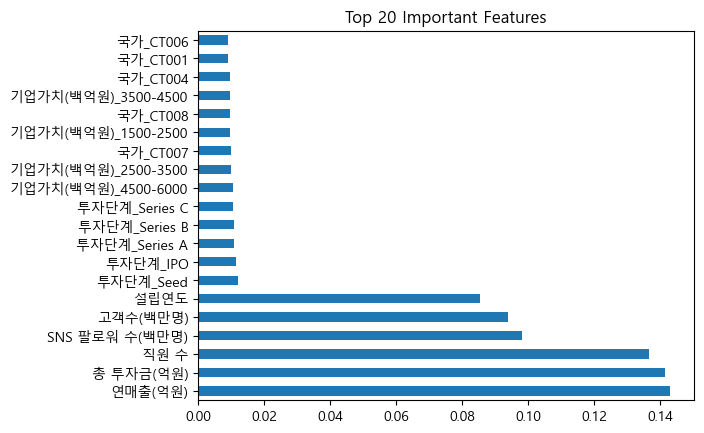

In [30]:
import os
import matplotlib.pyplot as plt
# 윈도우 기본 한글 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic' 

model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
top_feats = feat_importances.nlargest(30).index.tolist()

# 시각화 (선택사항)
feat_importances.nlargest(20).plot(kind='barh', title='Top 20 Important Features')
plt.show()

In [32]:
import numpy as np

X_train_selected = X_train[top_feats]
X_test_selected = X_test[top_feats]

model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

submission = pd.DataFrame({
    "ID": test["ID"],
    "성공확률": y_pred
})
submission.to_csv("submission_RF_top_2.csv", index=False)

In [13]:
model = RandomForestRegressor(
        n_estimators=1000,
        max_depth=12,
        min_samples_split=4,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42
    )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
submission = pd.DataFrame({
    'ID': test['ID'],             # test 데이터에 있는 ID 컬럼
    '성공확률': y_pred
})

In [ ]:
submission.to_csv("submission_RandomForest4.csv",index=False)